In [112]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [113]:
df=pd.read_csv ('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [114]:
x=df.drop(columns=['quality','volatile acidity'])
y= df['quality'] 

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [116]:
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

LINEAR REGRESSION

In [117]:
model_1 = LogisticRegression()

In [118]:
model_1.fit(x_train,y_train)

LogisticRegression()

In [119]:
y_pred = (model_1.predict(x_test))

In [120]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# accuracy is 47%

0.553125


KNN

In [121]:
accuracy_rate=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_train,y_train,cv=9)
    accuracy_rate.append(score.mean())

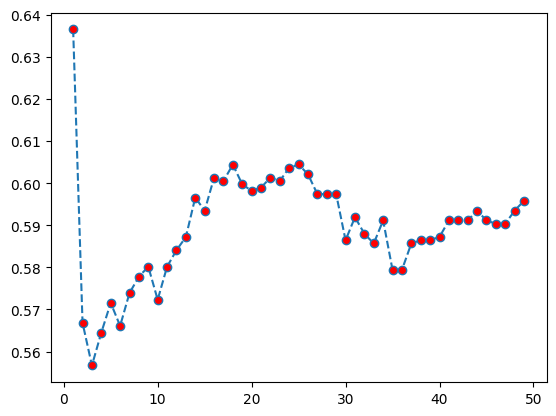

In [122]:
plt.plot(range(1,50),accuracy_rate,linestyle='dashed',marker='o',markerfacecolor='red')

DECISION TREE

In [123]:
model_3 = DecisionTreeClassifier()

In [124]:
model_3.fit(x_train, y_train)

DecisionTreeClassifier()

In [125]:
y_pred = model_3.predict(x_test)

In [126]:
accuracy = accuracy_score(y_test, y_pred)
accuracy 

0.553125

RANDOM FOREST

In [127]:
model_5 = RandomForestClassifier(n_estimators=100, random_state=42)

In [128]:
model_5.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [129]:
y_pred = model_5.predict(x_test)

In [130]:
accuracy = accuracy_score(y_test, y_pred)
accuracy 

0.640625

In [131]:
pickle.dump(model_3,open('model.pkl','wb'))

In [132]:
model=pickle.load(open('model.pkl','rb'))